In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 4

In [4]:
fnames = get_image_files("C:\\Users\\jenni\\Documents\\HTN Tests\\Images\\Yes\\Hepatitis B\\augComp")

In [5]:
fnames

[WindowsPath('C:/Users/jenni/Documents/HTN Tests/Images/Yes/Hepatitis B/augComp/no_190630.png'),
 WindowsPath('C:/Users/jenni/Documents/HTN Tests/Images/Yes/Hepatitis B/augComp/no_190631.png'),
 WindowsPath('C:/Users/jenni/Documents/HTN Tests/Images/Yes/Hepatitis B/augComp/no_190632.png'),
 WindowsPath('C:/Users/jenni/Documents/HTN Tests/Images/Yes/Hepatitis B/augComp/no_190633.png'),
 WindowsPath('C:/Users/jenni/Documents/HTN Tests/Images/Yes/Hepatitis B/augComp/no_190634.png'),
 WindowsPath('C:/Users/jenni/Documents/HTN Tests/Images/Yes/Hepatitis B/augComp/no_20990.png'),
 WindowsPath('C:/Users/jenni/Documents/HTN Tests/Images/Yes/Hepatitis B/augComp/no_20991.png'),
 WindowsPath('C:/Users/jenni/Documents/HTN Tests/Images/Yes/Hepatitis B/augComp/no_20992.png'),
 WindowsPath('C:/Users/jenni/Documents/HTN Tests/Images/Yes/Hepatitis B/augComp/no_20993.png'),
 WindowsPath('C:/Users/jenni/Documents/HTN Tests/Images/Yes/Hepatitis B/augComp/no_20994.png'),
 WindowsPath('C:/Users/jenni/Docume

In [6]:

np.random.seed(2)
pat = r'/([^/]+)_\d+.png$'

In [7]:
data = ImageDataBunch.from_name_re("C:\\Users\\jenni\\Documents\\HTN Tests\\Images\\Yes\\Hepatitis B\\augComp", fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

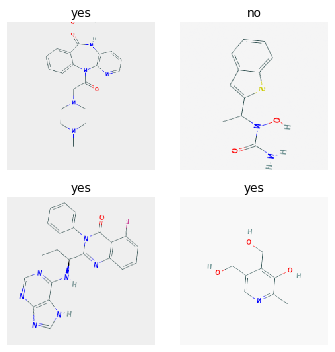

In [8]:
data.show_batch(rows=3, figsize=(5,5))

In [9]:
print(data.classes)
len(data.classes),data.c

['no', 'yes']


(2, 2)

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [11]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.803225,0.826757,0.432432,00:32
1,0.790713,0.918621,0.432432,00:31
2,0.713864,0.720155,0.243243,00:31
3,0.698174,0.664653,0.297297,00:31


In [13]:
learn.save('stage-1')

In [14]:

interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

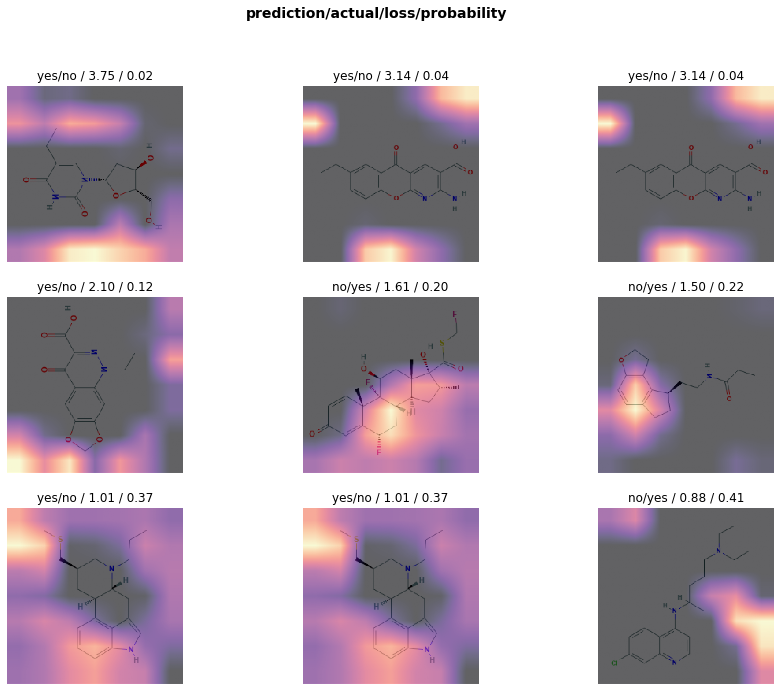

In [15]:

interp.plot_top_losses(9, figsize=(15,11))

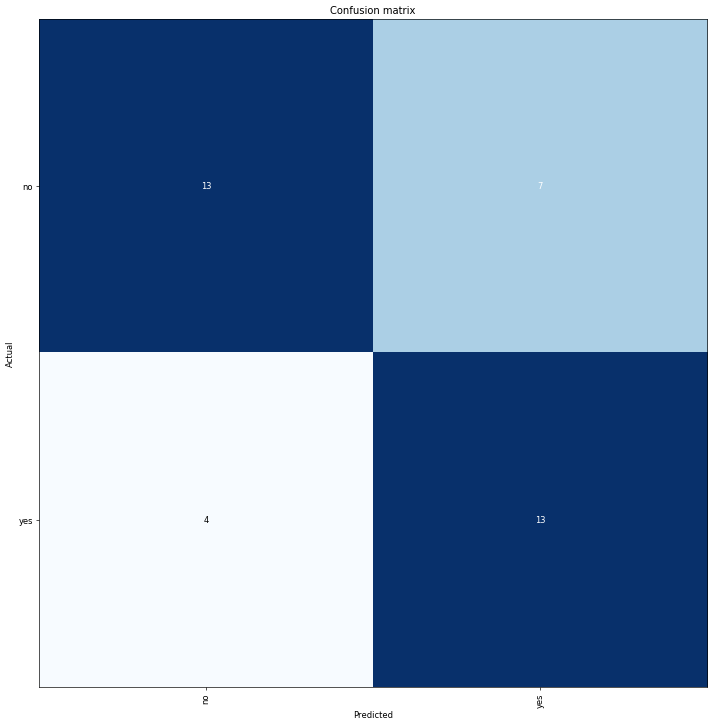

In [16]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [17]:
interp.most_confused(min_val=2)

[('no', 'yes', 7), ('yes', 'no', 4)]

In [18]:

learn.unfreeze()

In [19]:

learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.002743,0.830717,0.324324,00:32


In [20]:
learn.load('stage-1');

In [ ]:
learn.lr_find()

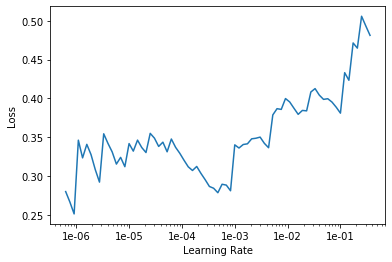

In [315]:
learn.recorder.plot()

In [316]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.362915,0.720166,0.113208,00:54
1,0.426182,0.354041,0.132075,00:52
2,0.384701,0.273010,0.113208,00:52
3,0.385517,0.262490,0.075472,00:52
4,0.357744,0.254603,0.075472,00:53


In [317]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

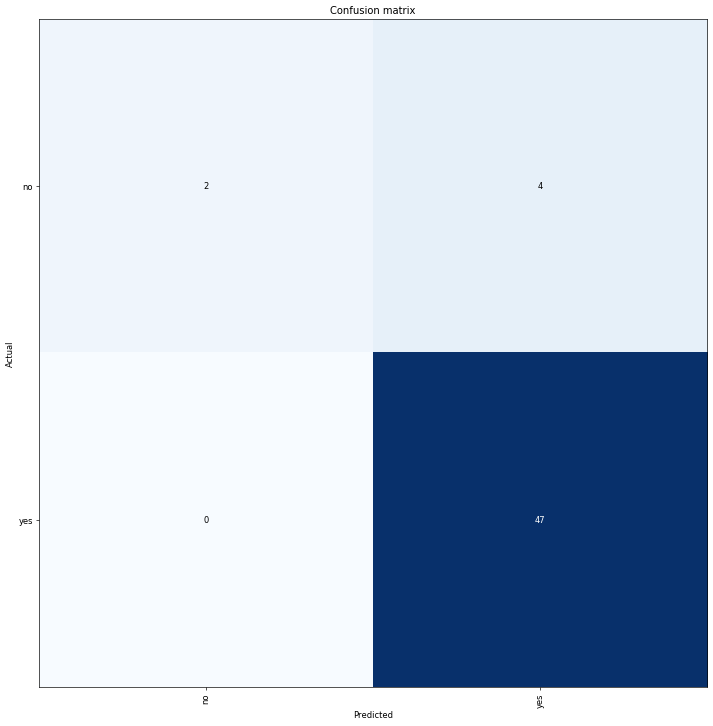

In [318]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [319]:
learn.save('stage-2')

In [320]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (212 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
no,no,no,no,no
Path: C:\Users\jenni\Documents\HTN Tests\Images\Yes\Breast Cancer\augComp;

Valid: LabelList (53 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
yes,yes,yes,yes,no
Path: C:\Users\jenni\Documents\HTN Tests\Images\Yes\Breast Cancer\augComp;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

In [64]:
def predict_score (file_name):
    results = []
    img=open_image(file_name)
    temp = str(learn.predict(img))
    import re
    words = temp.split()
    category = words[1]

    no_score = re.findall(r'\b\d+\b',words[3])[1]
    yes_score = re.findall(r'\b\d+\b',words[4])[1]
    
    results.append(no_score)
    results.append(yes_score)
    return results

In [65]:
learn.load('stage-2')
scores = []
for filename in os.listdir("C:\\Users\\jenni\\Documents\\HTN Tests\\Images\\Unlabelled"):
    if filename.endswith(".png"):
        scores.append(re.findall(r'\b\d+\b',filename))
        scores.append(predict_score("C:\\Users\\jenni\\Documents\\HTN Tests\\Images\\Unlabelled\\"+ filename))
        print(filename)
        

10000219.png
10001216.png
10001279.png
10001759.png
10001924.png
10002194.png
10002995.png
10004756.png
10005319.png
10005875.png
10012139.png
10012619.png
10015047.png
10015909.png
10016584.png
10016641.png
10017613.png
10017989.png
10018103.png
10018216.png
10018368.png
10019698.png
10019865.png
10020143.png
10021543.png
10022286.png
10023086.png
10023346.png
10023584.png
10023633.png
10024279.png
10024556.png
10025229.png
1002551.png
10025540.png
10026319.png
10027153.png
10028183.png
10028753.png
10037245.png
10038647.png
10038653.png
10039325.png
10039710.png
10040630.png
10041887.png
10041945.png
10042308.png
10042344.png
10043420.png
10043973.png
10044526.png
10044847.png
10044955.png
10045206.png
10046686.png
10046966.png
10047469.png
10048003.png
10050748.png
10051245.png
10051548.png
10051816.png
10054157.png
10057879.png
10059780.png
10061193.png
10062068.png
10062992.png
10064040.png
10064373.png
10066435.png
10066510.png
10067826.png
10072059.png
10072906.png
10073194.png


10906990.png
10907347.png
10908.png
10908401.png
10916627.png
10916944.png
1091707.png
10918029.png
1092434.png
10925450.png
10927562.png
10929552.png
10935302.png
10936267.png
10937.png
10938902.png
10949.png
10949077.png
10949178.png
10949952.png
10949979.png
10950709.png
10958844.png
10959312.png
10961299.png
10961625.png
1096454.png
1096481.png
1096544.png
1096556.png
1096868.png
10969173.png
10969956.png
10969997.png
10970843.png
10971050.png
10972245.png
10980927.png
1099169.png
10994361.png
10995703.png
10999666.png
1100576.png
11006295.png
11006418.png
110082254.png
110109494.png
11012673.png
11012721.png
11014198.png
11014552.png
11017.png
110217928.png
110219641.png
11021979.png
11021981.png
110220003.png
110221710.png
110221958.png
110222135.png
110222189.png
110223517.png
110223756.png
110223792.png
110225841.png
110226036.png
110226208.png
110229493.png
110233887.png
110234037.png
110234051.png
110234598.png
110234762.png
110240723.png
110240728.png
110241019.png
110241774

118720225.png
118720531.png
118720535.png
118720861.png
118721310.png
118721573.png
118721592.png
118721596.png
118721605.png
118722432.png
118723574.png
118723578.png
118723598.png
118723600.png
118723602.png
118723608.png
118723673.png
118723687.png
118724637.png
118724724.png
118724848.png
118724852.png
118725874.png
118726794.png
118727322.png
118727487.png
118727500.png
118728455.png
118729238.png
118729248.png
118729945.png
118730204.png
118730208.png
118730229.png
118730231.png
118730243.png
118730399.png
118730502.png
118730510.png
118730523.png
118730637.png
118730708.png
118730830.png
118731671.png
118731693.png
118731707.png
118732673.png
118732675.png
118732679.png
118732986.png
118733258.png
118733424.png
118733513.png
118733524.png
118733544.png
118733566.png
118733577.png
118733762.png
118733772.png
118733780.png
118733810.png
118733812.png
118733816.png
118733822.png
118733826.png
118734094.png
118734096.png
118734104.png
118734303.png
118734410.png
118734700.png
118735

122186578.png
122187861.png
122187868.png
122188035.png
122188039.png
122188041.png
122188043.png
122188045.png
122188154.png
122188438.png
122188792.png
122188806.png
122188876.png
122189590.png
122189592.png
122189596.png
122189598.png
122189604.png
122189610.png
122189618.png
122189626.png
122189642.png
122190791.png
122190799.png
122190809.png
122190811.png
122191360.png
122191370.png
122192626.png
122192692.png
122192810.png
122192820.png
122192824.png
122193111.png
122193125.png
122193129.png
122193320.png
122193347.png
122193620.png
122193624.png
122193626.png
122194674.png
122195606.png
122196495.png
122196525.png
122196590.png
122196597.png
122197528.png
12224367.png
12224369.png
122265.png
1222739.png
1222765.png
1222781.png
122282.png
122370504.png
12238502.png
122391187.png
122391188.png
122391189.png
122401010.png
122445050.png
122447376.png
12248306.png
122483222.png
122483226.png
122483256.png
122485129.png
122516123.png
122516126.png
122516127.png
122516140.png
12251620

127048441.png
127048444.png
127048702.png
127048937.png
127049113.png
127049939.png
127050575.png
127050706.png
127050874.png
127050902.png
127051014.png
127051154.png
127051170.png
127051590.png
127052013.png
127052014.png
12706474.png
12706476.png
1271370.png
127151.png
12715799.png
12715912.png
12719848.png
12719859.png
12719865.png
12719867.png
12719878.png
12719887.png
12719897.png
12721912.png
12724280.png
12724288.png
12724324.png
12724351.png
12733.png
12734121.png
12734131.png
12734133.png
12734137.png
12734143.png
12734155.png
12734177.png
12734179.png
12739458.png
12758299.png
12758304.png
12761732.png
12761735.png
12761741.png
12761748.png
12761758.png
12761797.png
12761814.png
12761820.png
12761822.png
12764718.png
12764753.png
12771264.png
12774955.png
12782361.png
12787836.png
12790019.png
127912.png
12793374.png
12793382.png
12793395.png
12793397.png
12793405.png
12793451.png
12793467.png
12799009.png
12801591.png
12801621.png
12801641.png
12803040.png
12805070.png
1280

135705508.png
135705514.png
135705518.png
135705524.png
135705530.png
135712655.png
135720958.png
1357349.png
135755532.png
13576469.png
135764890.png
13576540.png
13576545.png
13576557.png
1357892.png
135789843.png
135789863.png
135789874.png
135789878.png
135789911.png
135789936.png
135789942.png
135795210.png
13580767.png
135814559.png
135829865.png
135858943.png
135867621.png
135879930.png
135883664.png
135887931.png
135887934.png
13588893.png
135894076.png
1359091.png
135923186.png
135925070.png
135925103.png
135927280.png
135927283.png
135927287.png
135931694.png
135931717.png
135931718.png
135931719.png
135931720.png
13596021.png
135962935.png
135973941.png
135985822.png
135986087.png
135986096.png
13599023.png
13599025.png
135998722.png
135998723.png
135998726.png
135998732.png
135998738.png
135998858.png
135998865.png
136000535.png
136000675.png
136000691.png
136001934.png
136001952.png
136001954.png
136001958.png
136001964.png
136001972.png
136001974.png
136001981.png
1360019

137629905.png
137629908.png
137629910.png
137629911.png
137629912.png
137629913.png
137629914.png
137629915.png
137629916.png
137629918.png
137629919.png
137629920.png
137629921.png
137629923.png
137629926.png
137629933.png
137629934.png
137629935.png
137629937.png
137629948.png
137629949.png
137629950.png
137629951.png
137629953.png
137629954.png
137629956.png
137629957.png
137629958.png
137629959.png
137629962.png
137629963.png
137629964.png
137629965.png
137629966.png
137629967.png
137629969.png
137629970.png
137629971.png
137629972.png
137629973.png
137629978.png
137629979.png
137629980.png
137629984.png
137629987.png
137629988.png
137629990.png
137629991.png
137629992.png
137630005.png
137630015.png
137630018.png
137630019.png
137630021.png
137630022.png
137630024.png
137630025.png
137630043.png
137630049.png
137630051.png
137630053.png
137630057.png
137630063.png
137630067.png
137630073.png
137630077.png
137630079.png
137630080.png
137630082.png
137630083.png
137630084.png
137630

14086460.png
14086484.png
14086530.png
14089960.png
14089962.png
14091197.png
14091199.png
14091202.png
14091204.png
14091205.png
14091221.png
14091227.png
14091437.png
14091451.png
14091453.png
14091465.png
14097196.png
14099264.png
14099265.png
14099270.png
14116947.png
14128212.png
14130045.png
14130505.png
14138.png
14140346.png
14140348.png
14140365.png
14140367.png
14140372.png
14140375.png
14140392.png
14140393.png
14140409.png
14140415.png
14140424.png
14140426.png
14140428.png
14140432.png
1414349.png
14146426.png
14148199.png
14169855.png
1417751.png
14178379.png
14180631.png
14181385.png
14181392.png
14183225.png
14193423.png
14198621.png
14199882.png
14205677.png
1420670.png
14208320.png
14208344.png
14208346.png
14208350.png
14208353.png
14208363.png
14208367.png
14208374.png
14208388.png
14208390.png
14208395.png
14208411.png
1421013.png
14210593.png
14218.png
14219722.png
14220.png
14235.png
14253844.png
14276.png
14284.png
14298047.png
1429971.png
14307889.png
14328924.

16655690.png
166575.png
16658823.png
166589.png
16659334.png
16666425.png
166718.png
16671805.png
16672016.png
16673250.png
16673359.png
16674114.png
16674132.png
16676135.png
16676806.png
16676836.png
16676902.png
16677188.png
16677892.png
16680702.png
16718580.png
16719345.png
16719460.png
16719464.png
16719762.png
16722125.png
16730512.png
16735706.png
16735927.png
16735932.png
16736715.png
16741282.png
16743100.png
167449.png
16750573.png
16755745.png
16757785.png
16760148.png
16767753.png
16787045.png
16788847.png
1679104.png
16795839.png
16799951.png
16799953.png
16801170.png
16807498.png
16808686.png
16823075.png
168886.png
169703.png
170010.png
170313.png
170332.png
170346.png
170351.png
170368.png
1703684.png
17118.png
17132483.png
17156478.png
1716305.png
1716311.png
1716361.png
1716365.png
17213192.png
17221237.png
172288.png
17271275.png
1727864.png
1728163.png
17291.png
172981.png
173117.png
173299.png
17336.png
17349.png
173526.png
173719.png
17386098.png
17389941.png
174

23093595.png
2309716.png
2311729.png
2312201.png
2312213.png
23135.png
2314108.png
2314112.png
2315194.png
23160050.png
2316151.png
23167.png
2317736.png
2318527.png
2320521.png
2326.png
23275516.png
23275586.png
23275617.png
23275749.png
2328403.png
2329247.png
23296085.png
2329776.png
23298038.png
2329821.png
2330827.png
2330830.png
2331274.png
23313827.png
23321119.png
2332169.png
2332374.png
2332720.png
2333269.png
2333936.png
2334835.png
23358108.png
2335832.png
2335852.png
23393.png
23421.png
23427663.png
23435.png
23447010.png
2347585.png
2349537.png
2350704.png
23508.png
23512.png
23512784.png
2351323.png
2354155.png
2355081.png
23551485.png
23560.png
23561.png
2358975.png
2359004.png
23604858.png
23604860.png
23605692.png
23606608.png
2361184.png
23616906.png
23625019.png
23625230.png
23634994.png
23635121.png
23635243.png
23635743.png
23635745.png
23635862.png
23635868.png
23635989.png
23636117.png
23636235.png
23636356.png
23636366.png
23637934.png
2364305.png
23645421.png
2

28769543.png
28769545.png
28769553.png
28769557.png
28769560.png
28769563.png
28769566.png
28769571.png
2877641.png
2878802.png
2879634.png
2881693.png
2881788.png
2882246.png
2882309.png
2882339.png
2882362.png
2882427.png
2882443.png
2882519.png
2882637.png
2882652.png
2882692.png
2882826.png
2882934.png
2885589.png
28861060.png
2888300.png
2888481.png
2891773.png
2891887.png
28935.png
2896366.png
2900214.png
2901004.png
2902129.png
2902153.png
2902251.png
2902281.png
2902420.png
2902547.png
2903697.png
2903700.png
2906495.png
29069.png
29083.png
29088.png
2910808.png
2911.png
2912131.png
2912207.png
2912529.png
2913747.png
2915925.png
2919622.png
2919935.png
2919986.png
2920030.png
2920034.png
2920159.png
2920274.png
2923035.png
2923133.png
2923439.png
2923749.png
2924480.png
2927779.png
2928076.png
2929741.png
2930096.png
2930161.png
2930453.png
2930646.png
29307.png
2930774.png
2930874.png
2931903.png
2932264.png
2933277.png
2933677.png
2934681.png
2934986.png
2935025.png
2935042.

3660381.png
3662309.png
366468.png
3665971.png
36688356.png
366890.png
366935.png
3672160.png
3676420.png
367804.png
367821.png
368106.png
368336.png
36834.png
368365.png
36854.png
368609.png
3687777.png
368828.png
368966.png
368972.png
3690044.png
369113.png
3695786.png
369628.png
369682.png
3696840.png
369741.png
3697491.png
3697667.png
3700379.png
3700549.png
3703372.png
3704.png
370421.png
3705524.png
3705952.png
3706037.png
370646.png
370717.png
3707992.png
370811.png
370871.png
3713796.png
3715831.png
371627.png
3716403.png
372093.png
3721118.png
372116.png
3723105.png
3723806.png
372410.png
372693.png
372713.png
372751.png
372787.png
3730749.png
373081.png
3732011.png
3732649.png
373609.png
373668.png
373671.png
3736905.png
3737282.png
373803.png
374141.png
374530.png
374598.png
374853.png
3749545.png
374978.png
3751611.png
375263.png
375602.png
375917.png
375990.png
3760907.png
376164.png
37620.png
376262.png
376387.png
376396.png
376474.png
376477.png
376644.png
376667.png
376

44272796.png
44274625.png
44274749.png
44275011.png
44275082.png
44275139.png
44276105.png
44276111.png
44276697.png
44276797.png
44276930.png
44277164.png
44277607.png
44277625.png
44277657.png
44278015.png
44278733.png
44279013.png
44279604.png
44279642.png
44279671.png
44279767.png
44280007.png
44280202.png
44280265.png
44280483.png
44280864.png
44280884.png
44280892.png
44281123.png
44281198.png
44281223.png
44281229.png
44281242.png
44281268.png
44281351.png
44281733.png
44281749.png
44281752.png
44281759.png
44281782.png
44282137.png
44282142.png
44282380.png
44282383.png
44282927.png
44283154.png
44283355.png
44283452.png
44283467.png
44283634.png
44283659.png
44283724.png
44283741.png
44284249.png
44284270.png
44284394.png
44284439.png
44284444.png
44284453.png
44284485.png
44284504.png
44284531.png
44284657.png
44284681.png
44284717.png
44284827.png
44284856.png
44284916.png
44285183.png
44285185.png
44285200.png
44285202.png
44285359.png
44285398.png
44285452.png
44285539.png

44394757.png
44394795.png
44395675.png
44396177.png
44396215.png
44396234.png
44396238.png
44396627.png
44396777.png
44397042.png
443971.png
44397296.png
44397396.png
44398012.png
44398049.png
44398074.png
44398228.png
44398375.png
44398653.png
44398687.png
44398691.png
44398726.png
44398798.png
44398807.png
44398917.png
44398929.png
44399296.png
44399512.png
443997.png
44399853.png
44399877.png
4439996.png
44399991.png
44400576.png
44402357.png
44402727.png
44404909.png
44406722.png
44406837.png
44406841.png
44407002.png
44407639.png
44407641.png
44407830.png
44407856.png
44407859.png
44407868.png
44407946.png
44408369.png
44408420.png
44408519.png
44408555.png
44408658.png
44410069.png
44410356.png
44410605.png
44411099.png
44411170.png
44411177.png
44411185.png
44411208.png
44411224.png
44411241.png
44411258.png
44411397.png
44411430.png
44411456.png
44411466.png
44411507.png
44411510.png
44411518.png
44412110.png
44412723.png
44412725.png
44412727.png
44412753.png
44413859.png
4441

44572337.png
44572343.png
44572365.png
44572445.png
44572505.png
44572507.png
44572593.png
44572639.png
44572641.png
44572749.png
44572755.png
44572759.png
44572761.png
44572787.png
44572800.png
44572806.png
44573012.png
44573014.png
44573462.png
44573686.png
44573763.png
44573802.png
44574412.png
44576866.png
44576922.png
44577617.png
44577714.png
44577777.png
44578148.png
44578154.png
44578511.png
44579723.png
44581328.png
44581749.png
44581838.png
44582064.png
44582619.png
44582670.png
44582701.png
44583272.png
44584379.png
44584940.png
44585345.png
4458558.png
44586808.png
44586810.png
4458732.png
44587695.png
44587723.png
44587782.png
44588718.png
44588932.png
44589527.png
44589562.png
44590259.png
44590317.png
44590321.png
44592024.png
44592055.png
44592058.png
44593622.png
44595079.png
44602162.png
44602168.png
44602188.png
44602194.png
44602208.png
44602220.png
44602266.png
44602282.png
44602307.png
44602337.png
44611542.png
44611685.png
44627098.png
44627102.png
44627326.png
4

51035893.png
51035929.png
51035930.png
51036100.png
51036144.png
51037958.png
51038182.png
51038938.png
51038948.png
51039214.png
51039364.png
51040609.png
51041252.png
51044.png
51049667.png
51049680.png
51049687.png
51049825.png
51049972.png
51050129.png
51050245.png
51050545.png
51051247.png
51051330.png
51056390.png
51100.png
51104.png
51104766.png
51105359.png
51110161.png
511172.png
5113023.png
51131235.png
51131307.png
51131317.png
51131323.png
51131361.png
51131389.png
5116593.png
512086.png
512088.png
512090.png
512091.png
512095.png
512096.png
512097.png
5123659.png
5125479.png
5127211.png
5128450.png
5129834.png
5130596.png
5131186.png
5132536.png
51346883.png
51346884.png
51349827.png
51349829.png
51353678.png
5135378.png
51354275.png
51358931.png
5139658.png
5144037.png
51441.png
51451.png
5152269.png
51585781.png
5158918.png
5159973.png
5171247.png
51719.png
517232.png
517546.png
5177114.png
5183231.png
519382.png
5207635.png
5210946.png
52109975.png
5212716.png
5213244.p

56795872.png
56796565.png
567969.png
56798016.png
56798039.png
56799375.png
56799995.png
56807324.png
56807935.png
56810315.png
56812603.png
56817416.png
56819814.png
56835772.png
56840930.png
56849571.png
56850509.png
56850656.png
56850658.png
56851049.png
56851073.png
56851445.png
56879.png
56933750.png
56934302.png
56934460.png
56934978.png
56935342.png
56935474.png
56944331.png
56945167.png
56946577.png
56946579.png
56951512.png
56951514.png
5702329.png
5706724.png
57149578.png
57154289.png
57154618.png
5721204.png
57325937.png
57326032.png
57326146.png
57326325.png
57327966.png
57328577.png
57341105.png
57341114.png
57341141.png
57341303.png
57351256.png
57358854.png
5736181.png
5736277.png
5736626.png
5736680.png
57369982.png
57380640.png
57380646.png
57380867.png
57380869.png
57381330.png
57381334.png
57386325.png
57386581.png
57390267.png
57390271.png
57390285.png
57390311.png
57390378.png
57390542.png
57391010.png
57391598.png
57391624.png
57391703.png
57391756.png
57391821.pn

661289.png
661413.png
661419.png
661421.png
661423.png
662080.png
6620803.png
6620826.png
6620925.png
662500.png
662776.png
662778.png
662784.png
66280.png
662925.png
663062.png
663076.png
663221.png
663223.png
663225.png
663357.png
663361.png
663513.png
66381.png
664114.png
664268.png
664270.png
664428.png
664571.png
664868.png
66509302.png
66509673.png
66509687.png
66509696.png
66509738.png
66509781.png
66509990.png
66509997.png
66510133.png
665172.png
665174.png
66546204.png
66548686.png
665568.png
665570.png
66558145.png
66571028.png
66571030.png
66576740.png
666166.png
666168.png
666328.png
66645472.png
66647021.png
66661889.png
66679.png
6670.png
667075.png
667225.png
6673.png
667449.png
667491.png
66754.png
667608.png
66796420.png
66796429.png
66796493.png
66796822.png
66796903.png
66797061.png
66797163.png
6680.png
66847.png
66885.png
66957228.png
66975648.png
66976298.png
66976718.png
67005.png
67047501.png
67077825.png
6711442.png
6712239.png
6712352.png
6712727.png
6712739.p

7208058.png
7208209.png
7208237.png
7208254.png
7208399.png
7208648.png
7208757.png
7208771.png
7208775.png
7208782.png
72088.png
7208855.png
7208897.png
7208915.png
7208937.png
720941.png
7210.png
72135.png
72164811.png
72164813.png
72164817.png
72165090.png
72167.png
721686.png
72196433.png
72197313.png
72197643.png
72197879.png
72198049.png
72198051.png
72198234.png
72198236.png
72198238.png
72198435.png
72199039.png
72199164.png
72199168.png
72199172.png
72203638.png
72203640.png
72204000.png
72204360.png
72204366.png
72204371.png
72204566.png
72204697.png
72205519.png
72205705.png
72205907.png
72205908.png
723700.png
72375097.png
72375172.png
72375302.png
72375398.png
72375514.png
72375515.png
72375623.png
72375628.png
72375629.png
72375631.png
72375633.png
72375730.png
72375907.png
725421.png
72544374.png
72544378.png
72544379.png
72544416.png
72544420.png
72544862.png
72544864.png
72546518.png
72546757.png
72546758.png
72546763.png
72546764.png
72547017.png
72547052.png
725725.p

8863.png
886910.png
887424.png
887623.png
8880.png
88820272.png
88923489.png
88923708.png
88923851.png
89074154.png
891885.png
8923.png
89366.png
89432510.png
89447069.png
89447571.png
894607.png
89467330.png
89496041.png
895131.png
895313.png
895358.png
89566.png
895777.png
89667921.png
89667922.png
89683805.png
89741619.png
89750317.png
89750348.png
89764937.png
89765117.png
89767.png
8992.png
8993.png
9000.png
90037467.png
90037564.png
90037582.png
90037621.png
90037627.png
90038207.png
90038217.png
90038299.png
90038336.png
90038383.png
90038396.png
90038416.png
90038499.png
90038647.png
90038667.png
90039006.png
90039449.png
9005.png
900985.png
90188146.png
90202945.png
90204401.png
902067.png
90212973.png
902329.png
90263.png
90300488.png
90344346.png
90344477.png
90344488.png
90356762.png
90356953.png
90452895.png
90452904.png
90454995.png
90467319.png
904747.png
90480102.png
90480133.png
90480135.png
905566.png
90612.png
906210.png
90643747.png
90643752.png
90643939.png
9064394

97380586.png
97380597.png
97380625.png
97380627.png
97380652.png
97380679.png
97380687.png
97380691.png
97380736.png
97380898.png
97380919.png
97380942.png
97380965.png
97380982.png
97381439.png
97381450.png
97381483.png
97381499.png
97381529.png
97381538.png
97381613.png
97381624.png
97381634.png
97381668.png
97381671.png
97381699.png
97382095.png
97382096.png
97382123.png
97382131.png
97382137.png
97382172.png
97382178.png
97382187.png
97384246.png
97384247.png
97384253.png
97384456.png
97384486.png
97384655.png
97384707.png
97385338.png
97385416.png
97385541.png
97385652.png
97385706.png
97386179.png
97386270.png
97386573.png
97386646.png
97386792.png
97386819.png
97386830.png
97386894.png
97386899.png
97387009.png
97387137.png
97387201.png
97387293.png
97387580.png
97387764.png
97387770.png
97388022.png
97388143.png
97388177.png
97388217.png
97388355.png
97388420.png
97388421.png
97388463.png
97388542.png
97388708.png
97388970.png
97389631.png
97389645.png
97389657.png
97389748.png

97520145.png
97520205.png
97520287.png
97520291.png
97520293.png
97520299.png
97520303.png
97520304.png
97520306.png
97520344.png
97520524.png
97520786.png
97521250.png
97521348.png
97521451.png
97521465.png
97521536.png
97521539.png
97521554.png
97521555.png
97521575.png
97521631.png
97521733.png
97521765.png
97521802.png
97522422.png
97523578.png
97524619.png
97524626.png
97525793.png
97525798.png
97525849.png
97525869.png
97526391.png
97526481.png
97527863.png
97528501.png
975890.png
976248.png
976640.png
977931.png
9794080.png
97949839.png
97949901.png
97949902.png
97949966.png
9795.png
97950000.png
97950001.png
97950016.png
97950066.png
97950171.png
9795427.png
97960073.png
979682.png
979684.png
9797162.png
979792.png
979794.png
9798183.png
9798900.png
9800626.png
9800765.png
9801167.png
9801570.png
9802289.png
9802404.png
9805251.png
980551.png
98062.png
9813184.png
9813414.png
9815552.png
9816502.png
9816725.png
9817619.png
9817623.png
9817845.png
9818804.png
9822724.png
9825069

In [66]:
scores

[['10000219'],
 ['8248', '1752'],
 ['10001216'],
 ['9472', '0528'],
 ['10001279'],
 ['9411', '0589'],
 ['10001759'],
 ['9928', '0072'],
 ['10001924'],
 ['8633', '1367'],
 ['10002194'],
 ['5277', '4723'],
 ['10002995'],
 ['7525', '2475'],
 ['10004756'],
 ['7036', '2964'],
 ['10005319'],
 ['9727', '0273'],
 ['10005875'],
 ['7697', '2303'],
 ['10012139'],
 ['0507', '9493'],
 ['10012619'],
 ['2625', '7375'],
 ['10015047'],
 ['9292', '0708'],
 ['10015909'],
 ['1917', '8083'],
 ['10016584'],
 ['9880', '0120'],
 ['10016641'],
 ['8674', '1326'],
 ['10017613'],
 ['5970', '4030'],
 ['10017989'],
 ['0927', '9073'],
 ['10018103'],
 ['4729', '5271'],
 ['10018216'],
 ['2208', '7792'],
 ['10018368'],
 ['5282', '4718'],
 ['10019698'],
 ['9678', '0322'],
 ['10019865'],
 ['7837', '2163'],
 ['10020143'],
 ['8622', '1378'],
 ['10021543'],
 ['9693', '0307'],
 ['10022286'],
 ['0555', '9445'],
 ['10023086'],
 ['3377', '6623'],
 ['10023346'],
 ['8603', '1397'],
 ['10023584'],
 ['9553', '0447'],
 ['10023633'],

In [67]:
saved_scores = scores

In [83]:
scores = saved_scores

In [84]:
l_scores = []

In [85]:
#now add back the original training data to the lists
for filename in os.listdir("C:\\Users\\jenni\\Documents\\HTN Tests\\Images\\Yes\\Hepatitis B\\Comp"):
    if filename.endswith(".png"):
        name = filename.replace(".png", "")
        if "no" in filename:
            l_scores.append(name.replace("no_", ""))
            l_scores.append([10000,0])
        elif "yes" in filename:
            l_scores.append(name.replace("yes_", ""))
            l_scores.append([0,10000])
           

In [86]:
#now add back the original training data to the lists
for filename in os.listdir("C:\\Users\\jenni\\Documents\\HTN Tests\\Images\\Yes\\Breast Cancer\\Comp"):
    if filename.endswith(".png"):
        name = filename.replace(".png", "")
        if "no" in filename:
            l_scores.append(name.replace("no_", ""))

        elif "yes" in filename:
            l_scores.append(name.replace("yes_", ""))
 
        l_scores.append(predict_score("C:\\Users\\jenni\\Documents\\HTN Tests\\Images\\Yes\\Breast Cancer\\Comp\\"+ filename))

In [87]:
count = 0
cids = []
no_scores = []
yes_scores = []
for s in scores:
    if count%2 == 0 or count == 0:
        temp = re.findall(r'\b\d+\b',str(s[0]))
        temp = str(temp).strip("'[]'")
        cids.append(float(temp))
        
        
    else:
        
      #  if float(int(s[0])) is 0.0 or 1.0:
       #     temp =float(int(s[0]))
        #else:

        temp = float(int(s[0]))*0.0001           
        no_scores.append(temp)
        
     #   if float(int(s[1])) is 0.0 or 1.0:
      #      temp =float(int(s[1]))
       # else:
        temp = float(int(s[1]))*0.0001           
        yes_scores.append(temp)
        
    count+=1

In [88]:
cids

[10000219.0,
 10001216.0,
 10001279.0,
 10001759.0,
 10001924.0,
 10002194.0,
 10002995.0,
 10004756.0,
 10005319.0,
 10005875.0,
 10012139.0,
 10012619.0,
 10015047.0,
 10015909.0,
 10016584.0,
 10016641.0,
 10017613.0,
 10017989.0,
 10018103.0,
 10018216.0,
 10018368.0,
 10019698.0,
 10019865.0,
 10020143.0,
 10021543.0,
 10022286.0,
 10023086.0,
 10023346.0,
 10023584.0,
 10023633.0,
 10024279.0,
 10024556.0,
 10025229.0,
 1002551.0,
 10025540.0,
 10026319.0,
 10027153.0,
 10028183.0,
 10028753.0,
 10037245.0,
 10038647.0,
 10038653.0,
 10039325.0,
 10039710.0,
 10040630.0,
 10041887.0,
 10041945.0,
 10042308.0,
 10042344.0,
 10043420.0,
 10043973.0,
 10044526.0,
 10044847.0,
 10044955.0,
 10045206.0,
 10046686.0,
 10046966.0,
 10047469.0,
 10048003.0,
 10050748.0,
 10051245.0,
 10051548.0,
 10051816.0,
 10054157.0,
 10057879.0,
 10059780.0,
 10061193.0,
 10062068.0,
 10062992.0,
 10064040.0,
 10064373.0,
 10066435.0,
 10066510.0,
 10067826.0,
 10072059.0,
 10072906.0,
 10073194.0,


In [89]:
count = 0
for s in l_scores:
    if count%2 == 0 or count == 0:
        cids.append(s)
        
    else:
        
      #  if float(int(s[0])) is 0.0 or 1.0:
       #     temp =float(int(s[0]))
        #else:

        temp = float(int(s[0]))*0.0001 
        no_scores.append(temp)
        
     #   if float(int(s[1])) is 0.0 or 1.0:
      #      temp =float(int(s[1]))
       # else:
        temp = float(int(s[1]))*0.0001 
        yes_scores.append(temp)
        
    count= count +1
        
  
    

In [90]:
f_cids = [float(i) for i in cids]

In [91]:
import pandas as pd
df = pd.DataFrame({"CID": f_cids, "hb_no_img": no_scores, "hb_yes_img": yes_scores})
df

,CID,hb_no_img,hb_yes_img
0,10000219.0,0.8248,0.1752
1,10001216.0,0.9472,0.0528
2,10001279.0,0.9411,0.0589
3,10001759.0,0.9928,0.0072
4,10001924.0,0.8633,0.1367
5,10002194.0,0.5277,0.4723
6,10002995.0,0.7525,0.2475
7,10004756.0,0.7036,0.2964
8,10005319.0,0.9727,0.0273
9,10005875.0,0.7697,0.2303


In [92]:
df2 = pd.read_csv("data_00-32.csv")
df2.head(5)

,Unnamed: 0,CID,bc_no_img,bc_yes_img,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,ChEMBL ID,Name,Synonyms,...,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Images,alzheimer,breast cancer,hep B
0,0,10000219.0,0.0616,0.9384,11262,11262,11262,CHEMBL1204513,NaN,NaN,...,1,0,386.0987,ACID,C14H27O6PS2,CCCCC(=O)SC[C@H](COP(=O)(O)OC)SC(=O)CCCC,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN
1,1,10001216.0,0.0539,0.9461,14105,14105,14105,CHEMBL1193207,NaN,NaN,...,0,0,403.1856,NEUTRAL,C19H25N5O5,CN1C(=O)C=C(N2CCN(CCCOc3cccc(c3)[N+](=O)[O-])C...,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN
2,2,10001279.0,0.0340,0.9660,13665,13665,13665,CHEMBL1189691,NaN,NaN,...,0,0,404.1882,NEUTRAL,C20H28N4O3S,CSc1ccccc1OCCCN2CCN(CC2)C3=CC(=O)N(C)C(=O)N3C,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN
3,3,10001759.0,0.0370,0.9630,6219,6219,6219,CHEMBL1189655,NaN,NaN,...,0,0,412.1918,NEUTRAL,C24H29ClN2O2,Clc1ccc(cc1)C2(CCCC2)C(=O)OCCN3CCN(CC3)c4ccccc4,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN
4,4,10001924.0,0.1034,0.8966,11410,11410,11410,CHEMBL1189255,NaN,NaN,...,1,0,379.1896,NEUTRAL,C22H25N3O3,Cc1cccc2COC(=O)N(C3CCN(CC(=O)Nc4ccccc4)CC3)c12,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN


In [93]:
df3 = pd.merge(left = df, right = df2, how = 'left', left_on="CID", right_on = "CID")
df3

,CID,hb_no_img,hb_yes_img,Unnamed: 0,bc_no_img,bc_yes_img,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,ChEMBL ID,...,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Images,alzheimer,breast cancer,hep B
0,10000219.0,0.8248,0.1752,0,0.0616,0.9384,11262,11262,11262,CHEMBL1204513,...,1,0,386.0987,ACID,C14H27O6PS2,CCCCC(=O)SC[C@H](COP(=O)(O)OC)SC(=O)CCCC,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN
1,10001216.0,0.9472,0.0528,1,0.0539,0.9461,14105,14105,14105,CHEMBL1193207,...,0,0,403.1856,NEUTRAL,C19H25N5O5,CN1C(=O)C=C(N2CCN(CCCOc3cccc(c3)[N+](=O)[O-])C...,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN
2,10001279.0,0.9411,0.0589,2,0.0340,0.9660,13665,13665,13665,CHEMBL1189691,...,0,0,404.1882,NEUTRAL,C20H28N4O3S,CSc1ccccc1OCCCN2CCN(CC2)C3=CC(=O)N(C)C(=O)N3C,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN
3,10001759.0,0.9928,0.0072,3,0.0370,0.9630,6219,6219,6219,CHEMBL1189655,...,0,0,412.1918,NEUTRAL,C24H29ClN2O2,Clc1ccc(cc1)C2(CCCC2)C(=O)OCCN3CCN(CC3)c4ccccc4,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN
4,10001924.0,0.8633,0.1367,4,0.1034,0.8966,11410,11410,11410,CHEMBL1189255,...,1,0,379.1896,NEUTRAL,C22H25N3O3,Cc1cccc2COC(=O)N(C3CCN(CC(=O)Nc4ccccc4)CC3)c12,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN
5,10002194.0,0.5277,0.4723,5,0.0788,0.9212,6116,6116,6116,CHEMBL1205030,...,2,0,398.0767,ACID,C17H19O9P,COc1ccc(cc1OP(=O)(O)O)C(=O)c2cc(OC)c(OC)c(OC)c2,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN
6,10002995.0,0.7525,0.2475,6,0.0422,0.9578,2429,2429,2429,CHEMBL1196972,...,1,0,433.1824,BASE,C25H27N3O2S,CN1Cc2ccc(NS(=O)(=O)C)cc2C(N=C1CCc3ccccc3)c4cc...,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN
7,10004756.0,0.7036,0.2964,7,0.0236,0.9764,3162,3162,3162,CHEMBL1196958,...,5,0,466.3407,BASE,C26H46N2O5,CCCCNC(=O)[C@H](C)C[C@H](O)[C@@H](N)C[C@H](Cc1...,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN
8,10005319.0,0.9727,0.0273,8,0.0291,0.9709,8948,8948,8948,CHEMBL1191268,...,0,0,442.2468,BASE,C25H34N2O5,COc1ccc(CCN(C)CCCN2CCc3cc(OC)c(OC)cc3C2=O)cc1OC,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN
9,10005875.0,0.7697,0.2303,9,0.0567,0.9433,8462,8462,8462,CHEMBL1791465,...,6,1,395.1496,NEUTRAL,C16H23N6O4S+,C[S+](C[C@H]1O[C@H]([C@H](O)[C@@H]1O)n2cnc3c(N...,https://www.ebi.ac.uk/chembl/api/data/image/CH...,NaN,NaN,NaN


In [94]:
df3.to_csv("img_data_all_final.csv")